In [240]:
 # Import libraries
import pandas as pd
import pickle as pk

# import libraries for api
import os
from dotenv import load_dotenv 
import requests
import json

# import libraries for vizualization (update)
import plotly.express as px
import panel as pn
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [166]:
#from Thomas's code 

filename = "Zillow_data"
infile = open(filename,'rb')
new_dict = pk.load(infile)
infile.close()
z_for_sale_resp =new_dict.json()
current_zillow_df = pd.json_normalize(data=z_for_sale_resp["props"])
print('num of rows:', len(current_zillow_df))
print('num of columns:', len(current_zillow_df.columns))

current_zillow_df.head()

num of rows: 40
num of columns: 18


,bathrooms,propertyType,lotAreaValue,address,imgSrc,price,listingDateTime,listingStatus,zpid,longitude,latitude,lotAreaUnit,daysOnZillow,bedrooms,country,currency,livingArea,hasImage
0,2,SINGLE_FAMILY,1742.40,"318 W Ruscomb St, Philadelphia, PA 19120",https://photos.zillowstatic.com/fp/c528e4507f6...,150000,None,FOR_SALE,10428068,-75.130410,40.026787,sqft,-1,4,USA,USD,1440,True
1,2,SINGLE_FAMILY,3920.40,"4913 Castor Ave, Philadelphia, PA 19124",https://photos.zillowstatic.com/fp/84229141ec1...,325000,None,FOR_SALE,10291269,-75.091110,40.024803,sqft,-1,4,USA,USD,1920,True
2,4,SINGLE_FAMILY,0.43,"200 W Walnut Ln, Philadelphia, PA 19144",https://photos.zillowstatic.com/fp/b90b6b03745...,869000,None,FOR_SALE,2068504637,-75.181816,40.037050,acres,-1,5,USA,USD,3857,True
3,4,SINGLE_FAMILY,9583.20,"2320 N 50th St, Philadelphia, PA 19131",https://photos.zillowstatic.com/fp/458505836a3...,267000,None,FOR_SALE,10486635,-75.227104,39.996180,sqft,-1,5,USA,USD,4520,True
4,3,SINGLE_FAMILY,3049.20,"522 Gilham St, Philadelphia, PA 19111",https://photos.zillowstatic.com/fp/04cc332dd77...,144000,None,FOR_SALE,2071261604,-75.092926,40.050960,sqft,-1,5,USA,USD,2007,True


In [167]:
#thomas code
zpid_list = current_zillow_df["zpid"].tolist()
current_zillow_df.columns
### Select columns that we will need for the analysis
current_zillow_df.columns
current_price_df = current_zillow_df[[ "zpid","propertyType" , "price", "livingArea" , "bathrooms" , "bedrooms" ,"address", "listingStatus" , "latitude" , "longitude", "imgSrc"]].copy()
current_price_df.set_index("zpid", inplace=True)


#Pull only the zip code from the address column
current_price_df["address"] = current_price_df["address"].str[-5:]

# Change the column names to improve readability
current_price_df.rename(columns = {
        "livingArea" : "Area in sqft.",
        "propertyType" : "Type of Property",
        "address" : "zip code",
        "listingStatus" : "Status",
        "imgSrc" : "Image property"
        }, inplace = True)
current_price_df.head()

,Type of Property,price,Area in sqft.,bathrooms,bedrooms,zip code,Status,latitude,longitude,Image property
zpid,,,,,,,,,,
10428068,SINGLE_FAMILY,150000,1440,2,4,19120,FOR_SALE,40.026787,-75.130410,https://photos.zillowstatic.com/fp/c528e4507f6...
10291269,SINGLE_FAMILY,325000,1920,2,4,19124,FOR_SALE,40.024803,-75.091110,https://photos.zillowstatic.com/fp/84229141ec1...
2068504637,SINGLE_FAMILY,869000,3857,4,5,19144,FOR_SALE,40.037050,-75.181816,https://photos.zillowstatic.com/fp/b90b6b03745...
10486635,SINGLE_FAMILY,267000,4520,4,5,19131,FOR_SALE,39.996180,-75.227104,https://photos.zillowstatic.com/fp/458505836a3...
2071261604,SINGLE_FAMILY,144000,2007,3,5,19111,FOR_SALE,40.050960,-75.092926,https://photos.zillowstatic.com/fp/04cc332dd77...


In [174]:
#thomas code
filename = "Zillow_old_data"
infile = open(filename,'rb')
new_source = pk.load(infile)
infile.close()
z_recently_sold_resp =new_source.json()
sold_zillow_df = pd.json_normalize(data=z_recently_sold_resp)
print('num of rows:', len(sold_zillow_df))
print('num of columns:', len(sold_zillow_df.columns))
sold_zillow_df.columns
sold_price_df = sold_zillow_df[[ "zpid", "homeType", "lastSoldPrice", "livingArea" , "bathrooms" , "bedrooms" , "address.zipcode",  "homeStatus" , "latitude" , "longitude", "miniCardPhotos"]].copy()
sold_price_df.set_index("zpid", inplace=True)

# Change the column names to improve readability
sold_price_df.rename(columns = {
        "homeType" : "Type of Property",
        "lastSoldPrice" : "price",
        "livingArea" : "Area in sqft.",
        "address.zipcode" :"zip code",
        "homeStatus" : "Status",
        "miniCardPhotos" : "Image property"
        }, inplace = True)

num of rows: 5
num of columns: 18


In [175]:
total_price_df = pd.concat([current_price_df,sold_price_df ], axis=0, join="inner")

total_price_df.head()

,Type of Property,price,Area in sqft.,bathrooms,bedrooms,zip code,Status,latitude,longitude,Image property
zpid,,,,,,,,,,
10428068,SINGLE_FAMILY,150000,1440,2,4,19120,FOR_SALE,40.026787,-75.130410,https://photos.zillowstatic.com/fp/c528e4507f6...
10291269,SINGLE_FAMILY,325000,1920,2,4,19124,FOR_SALE,40.024803,-75.091110,https://photos.zillowstatic.com/fp/84229141ec1...
2068504637,SINGLE_FAMILY,869000,3857,4,5,19144,FOR_SALE,40.037050,-75.181816,https://photos.zillowstatic.com/fp/b90b6b03745...
10486635,SINGLE_FAMILY,267000,4520,4,5,19131,FOR_SALE,39.996180,-75.227104,https://photos.zillowstatic.com/fp/458505836a3...
2071261604,SINGLE_FAMILY,144000,2007,3,5,19111,FOR_SALE,40.050960,-75.092926,https://photos.zillowstatic.com/fp/04cc332dd77...


In [177]:
#Add new columns in dataframes for "price per sqft"
current_price_df["price_per_sqft"] = current_price_df["price"] / current_price_df["Area in sqft."]

sold_price_df["price_per_sqft"] = sold_price_df["price"] / sold_price_df["Area in sqft."]



In [178]:
#Add a variable for the ZPID. Add a variable "Purchase_house" to be the ZPID of the house we are looking to buy. 
ZPID = '10285435'
Purchase_house = current_price_df.loc[[ZPID]]
Purchase_house

,Type of Property,price,Area in sqft.,bathrooms,bedrooms,zip code,Status,latitude,longitude,Image property,price_per_sqft
zpid,,,,,,,,,,,
10285435,SINGLE_FAMILY,458900,1984,3,4,19119,FOR_SALE,40.052326,-75.193275,https://photos.zillowstatic.com/fp/f5cca126d4e...,231.300403


In [179]:
# Add variables for the average price per square foot/bedrooms/bathrooms of the comparable properties
sold_average_price_per_sqft = sold_price_df['price_per_sqft'].mean()
sold_average_sqft = sold_price_df['Area in sqft.'].mean()
sold_average_bathrooms = sold_price_df['bathrooms'].mean()
sold_average_bedrooms = sold_price_df['bedrooms'].mean()

In [180]:
# Add variables for the price per square foot/bedrooms/bathrooms of the home we are looking to buy
Purchase_house_price_per_sqft = round(Purchase_house.loc[ZPID,'price_per_sqft'],2)
Purchase_house_sqft = round(Purchase_house.loc[ZPID,'Area in sqft.'],2)
Purchase_house_bathrooms = round(Purchase_house.loc[ZPID,'bathrooms'],2)
Purchase_house_bedrooms = round(Purchase_house.loc[ZPID,'bedrooms'],2)

In [181]:
# Add variables that are the difference per square foot/bedrooms/bathrooms of the comparables price per sqft vs. the house we want to buy
difference_price_per_sqft = round((sold_average_price_per_sqft - Purchase_house_price_per_sqft),2)
difference_sqft = round((sold_average_sqft - Purchase_house_sqft),2)
difference_bathrooms = round((sold_average_bathrooms - Purchase_house_bathrooms), 2)
difference_bedrooms = round((sold_average_bedrooms - Purchase_house_bedrooms), 2)

In [182]:
# Add a variable for our estimated Fair Value of the home we are looking to buy ( comparables average price per sq ft * purchase home sq ft)
Calculated_Home_Value = round((sold_average_price_per_sqft *  Purchase_house_sqft))

In [183]:
# Add a function to return our recommendation 
def recommendation(): 
    if sold_average_price_per_sqft > Purchase_house_price_per_sqft:
        return(f"We estimate the fair value of this house to be ${Calculated_Home_Value}. This house is ${difference_sqft} per square foot less expensive than comparable properties. We recommend you buy this house.")
    else:
        return(f"We estimate the fair value of this house to be ${Calculated_Home_Value}. This house is ${difference_sqft} per square foot more expensive than comparable properties. We don't recommend you buy this house.")
recommendation()

recommendation_text = recommendation()
recommendation_text

"We estimate the fair value of this house to be $421773. This house is $248.6 per square foot more expensive than comparable properties. We don't recommend you buy this house."

In [184]:
# Add functions to return other statistics on sqft
def other_info_sqft(): 
    if sold_average_sqft > Purchase_house_sqft:
        return(f"The property you are looking to buy has {difference_sqft: .2f} fewer square feet than the average of the comparables.")
    elif sold_average_sqft == Purchase_house_sqft:
        return(f"The property you are looking to buy has the same amount of square feet as the average of the comparable properties.")
    else:
        return(f"The property you are looking to buy has {difference_sqft: .2f} more square feet than the average of the comparables.")

other_info_sqft_text = other_info_sqft()

In [185]:
# Add functions to return other statistics on bathrooms
def other_info_bathrooms(): 
    if sold_average_bathrooms > Purchase_house_bathrooms:
        return(f"The property you are looking to buy has {difference_bathrooms: .2f} fewer bathrooms than the average of the comparables.")
    elif sold_average_bathrooms == Purchase_house_bathrooms:
        return(f"The property you are looking to buy has the same amount of bathrooms as the average of the comparable properties.")
    else:
        return(f"The property you are looking to buy has {difference_bathrooms: .2f} more bathrooms than the average of the comparables.")

other_info_bathrooms_text = other_info_bathrooms()

In [186]:
# Add functions to return other statistics on bedrooms
def other_info_bedrooms(): 
    if sold_average_bathrooms > Purchase_house_bathrooms:
        return(f"The property you are looking to buy has {difference_bedrooms: .2f} more bedrooms than the average of the comparables.")
    elif difference_bedrooms == 0.0:
        return(f"The property you are looking to buy has the same amount of bedrooms as the average of the comparable properties.")
    else:
        return(f"The property you are looking to buy has {difference_bedrooms: .2f} fewer bedrooms than the average of the comparables.")

other_info_bedrooms_text = other_info_bedrooms()

In [187]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from dash.dependencies import Input, Output

ModuleNotFoundError: No module named 'dash'

In [188]:
file=open('HouseForSale.html',"w")
file.write(recommendation_text)
file.close()

In [189]:
#test


#app.layout = html.Div[html.Div([ 
    #html.Div([
       # dcc.Input(
         #   id='ZID'.format('text'),
         #   type='text',
         #   placeholder="insert {}".format('text'),
          #  debounce=True,
         #   minLength=0, maxLength=50,
          #  disabled=False,
         #   readOnly=False,
           # required=False,
         #   size="20"
   #     ) 
 #   ,
#
        
 #   ])
#])]

In [190]:
#test

#dff = df.copy()
#dff = dff[dff['ZID'] == ZID]
#print("ZID:" + str(ZID)

In [191]:
# Vizualisations


In [192]:
## First vizualisation : comparison of caracteristics between current house for sale and mean house profile sold


<AxesSubplot:title={'center':' different house by neighborhood'}, xlabel='zip code'>

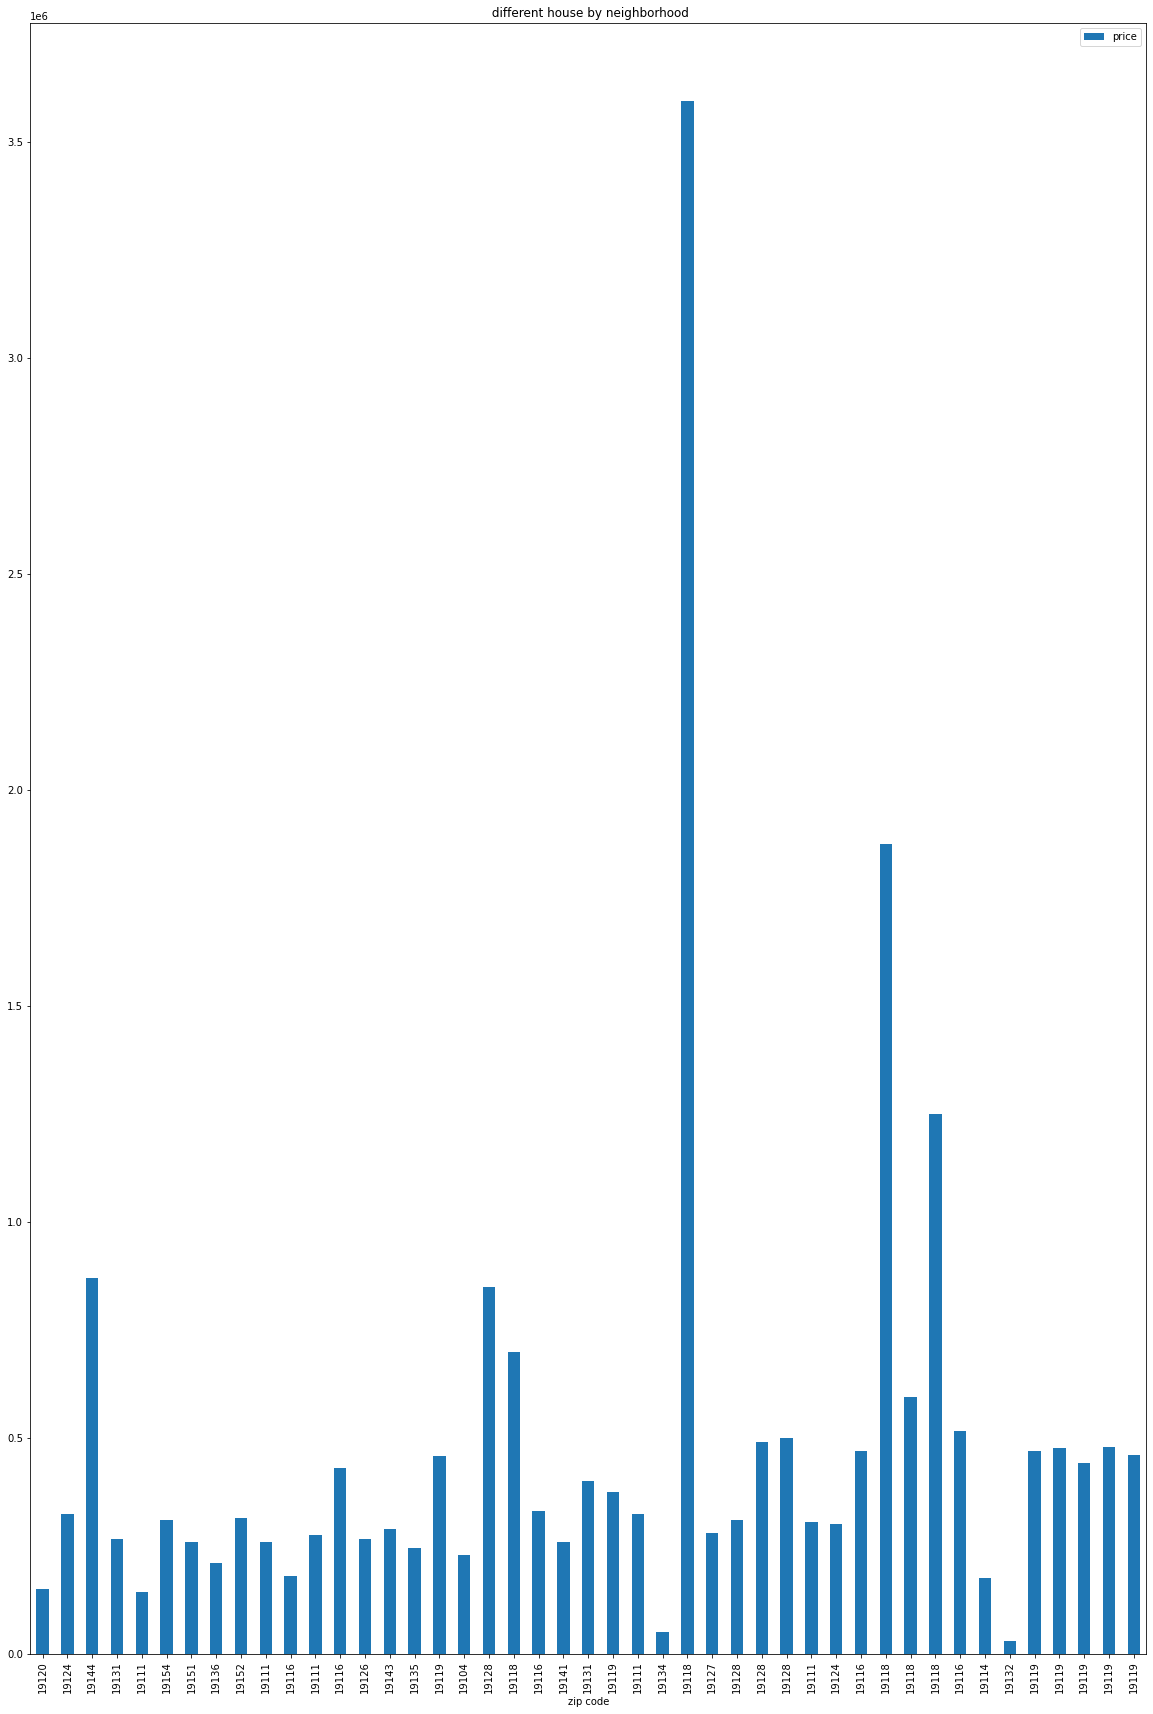

In [267]:
## Second vizualisation : House prices  by neighborhood 
total_price_df.plot.bar(x='zip code', y= 'price', title=' different house by neighborhood', figsize =(20, 30))

<AxesSubplot:>

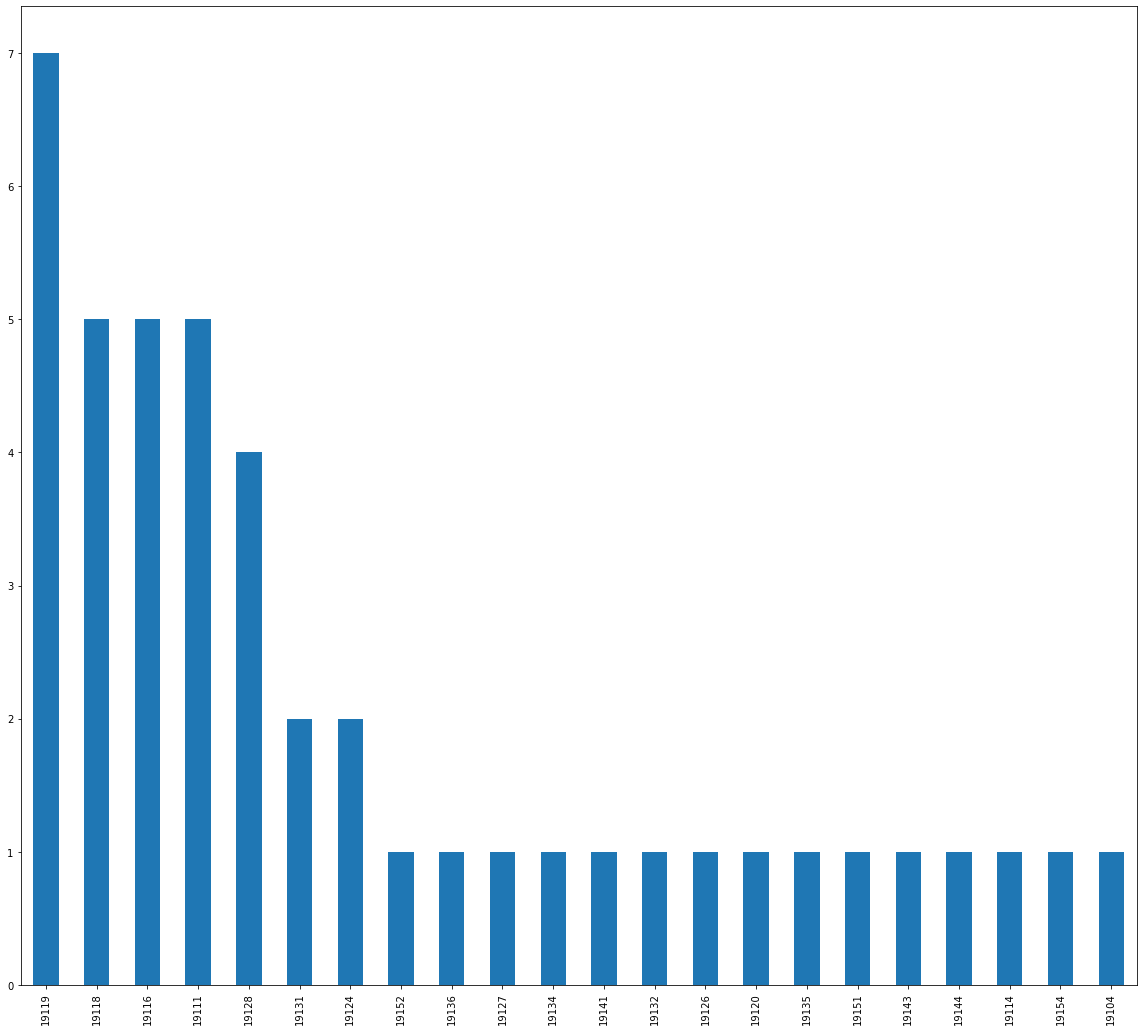

In [276]:
total_price_df['zip code'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Status'>

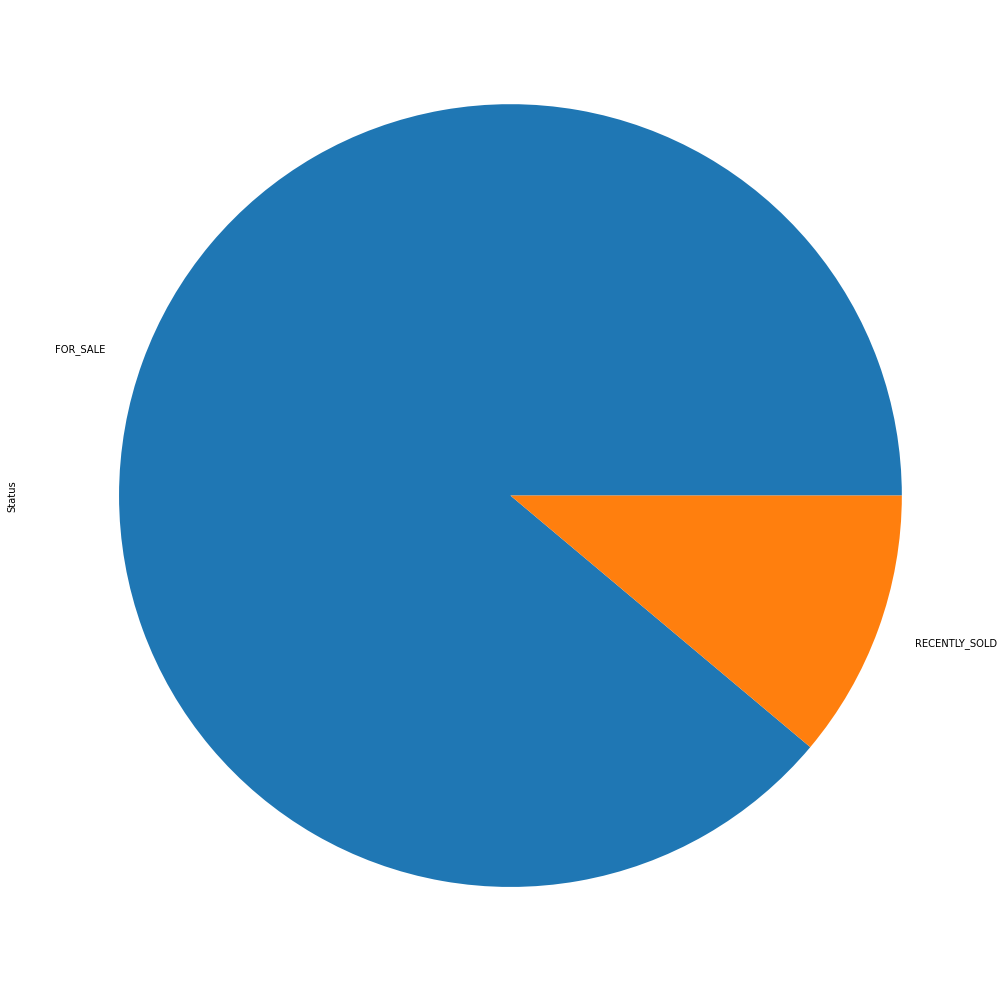

In [270]:
## Thirs vizualisation : House Listed  by Status 
total_price_df['Status'].value_counts().plot(kind='pie')

C:\Users\Jean-Pierre Koudifo\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


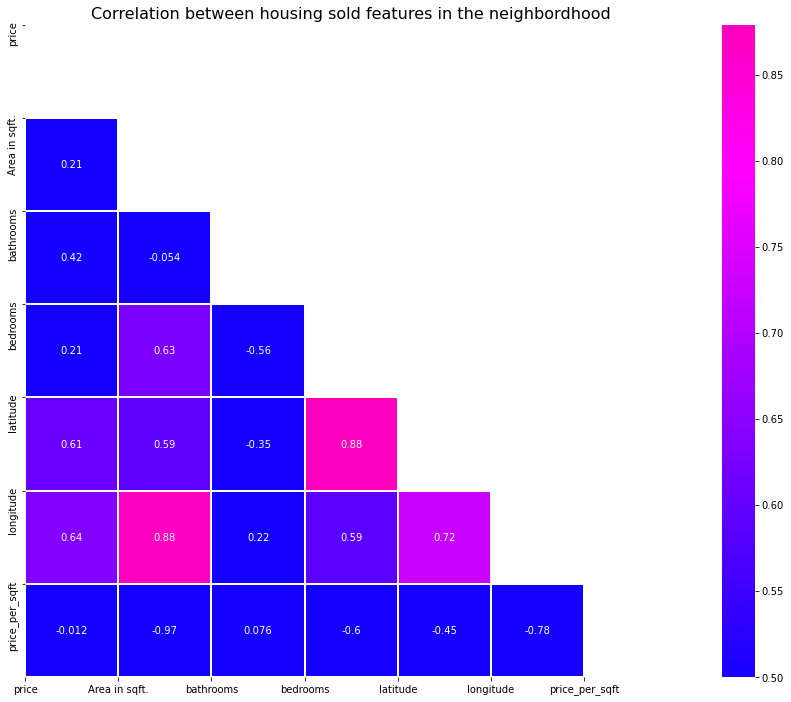

In [255]:
# fith Visualization 
## Correlation between housing sold Feature in the neighborhood  (area in sqf, bedrooms, bathrooms, price and location)

plt.figure(figsize=(16,12))

# Compute the correlation matrix

corr = sold_price_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, center=0, vmin=0.5, square=True, linewidths=1, cmap='gist_rainbow')
plt.title('Correlation between housing sold features in the neighbordhood', fontdict={'fontsize': 16})
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

In [271]:
# observation
print('There is strong correlation between bathrooms,  Area in sqf and location for all house sold') 

There is strong correlation between bathrooms,  Area in sqf and location for all house sold


In [274]:
#  sixth   Visualization -  histogram to show the  representation of the distribution of data for all House listed ( sold and current)
# Let look at the historigram of the all House  - we will drop  latitiude and longtitiude columns  for the purpose of this  Visulations 
total_price_df_1 = total_price_df.drop(['latitude'], axis =1)
total_price_df_1 = total_price_df_1.drop(['longitude'], axis =1)
total_price_df_1.head()

,Type of Property,price,Area in sqft.,bathrooms,bedrooms,zip code,Status,Image property
zpid,,,,,,,,
10428068,SINGLE_FAMILY,150000,1440,2,4,19120,FOR_SALE,https://photos.zillowstatic.com/fp/c528e4507f6...
10291269,SINGLE_FAMILY,325000,1920,2,4,19124,FOR_SALE,https://photos.zillowstatic.com/fp/84229141ec1...
2068504637,SINGLE_FAMILY,869000,3857,4,5,19144,FOR_SALE,https://photos.zillowstatic.com/fp/b90b6b03745...
10486635,SINGLE_FAMILY,267000,4520,4,5,19131,FOR_SALE,https://photos.zillowstatic.com/fp/458505836a3...
2071261604,SINGLE_FAMILY,144000,2007,3,5,19111,FOR_SALE,https://photos.zillowstatic.com/fp/04cc332dd77...


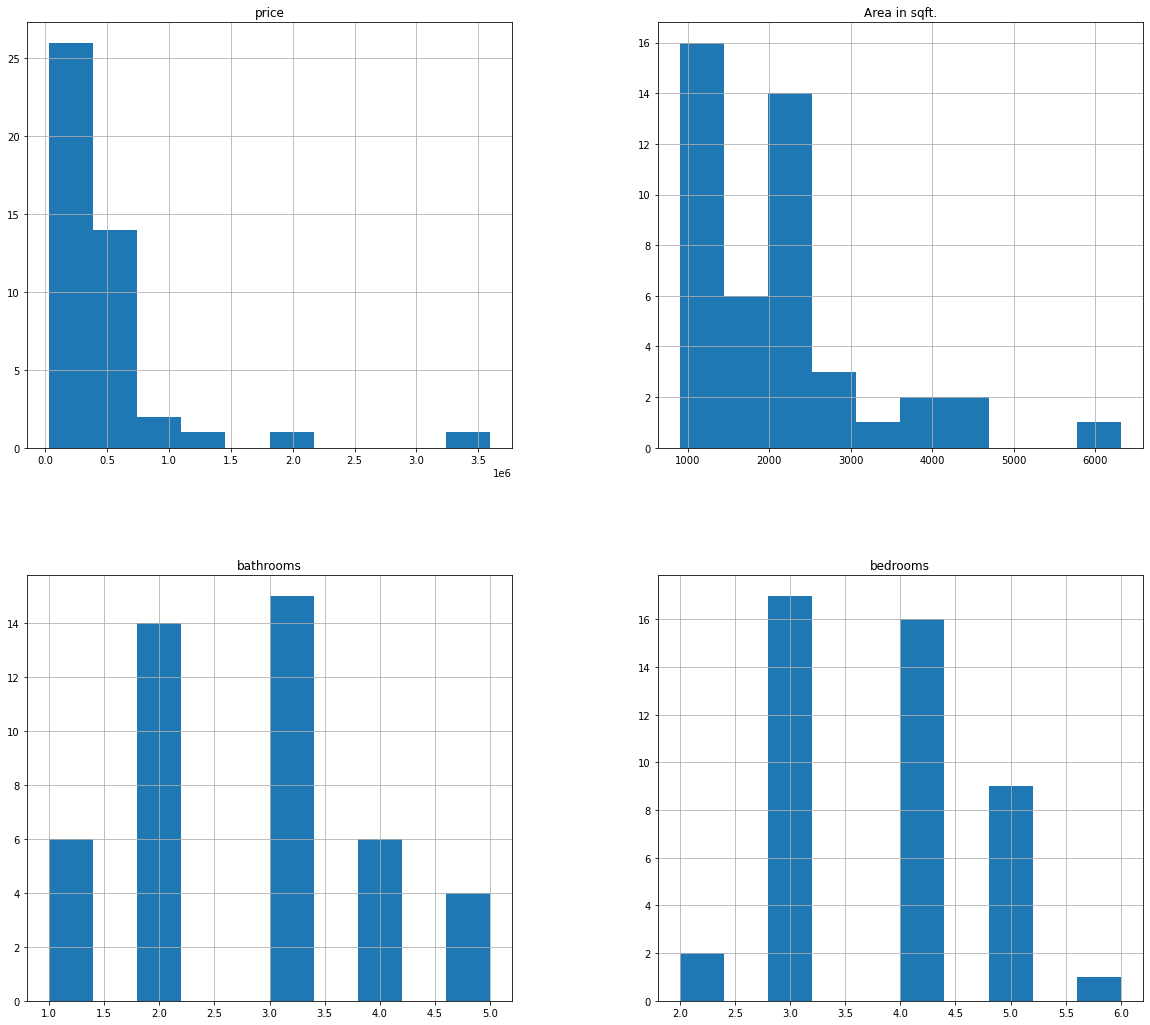

In [275]:
# House Data histogram 
total_price_df_1.hist(figsize = (20,18));